In [173]:
import numpy as np #linear algebra
import pandas as pd #data processing eg:-(I/O)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os


# data mining 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [174]:
print(train)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
5              FDP36       10.395          Regular         0.000000   
6              FDO10       13.650          Regular         0.012741   
7              FDP10          NaN          Low Fat         0.127470   
8              FDH17       16.200          Regular         0.016687   
9              FDU28       19.200          Regular         0.094450   
10             FDY07       11.800          Low Fat         0.000000   
11             FDA03       18.500          Regular         0.045464   
12             FDX32       15.100          Regular         0.100014   
13    

In [175]:
print(test)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
5              FDH56        9.800          Regular         0.063817   
6              FDL48       19.350          Regular         0.082602   
7              FDC48          NaN          Low Fat         0.015782   
8              FDN33        6.305          Regular         0.123365   
9              FDA36        5.985          Low Fat         0.005698   
10             FDT44       16.600          Low Fat         0.103569   
11             FDQ56        6.590          Low Fat         0.105811   
12             NCC54          NaN          Low Fat         0.171079   
13    

In [176]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [177]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [178]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [179]:
# We need to predict Item_Outlet_Sales for given test data

test['Item_Outlet_Sales'] = 0
data = pd.concat([train,test],sort = False)
print(train.shape,test.shape,data.shape)
#train_id = data.Item_Identifier
#print(train_id)

(8523, 12) (5681, 12) (14204, 12)


In [180]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [181]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())

Skewness: 1.544684
Kurtsis: 2.419439


In [182]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [183]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

C:\Users\91737\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 1.177531 , highly skewed


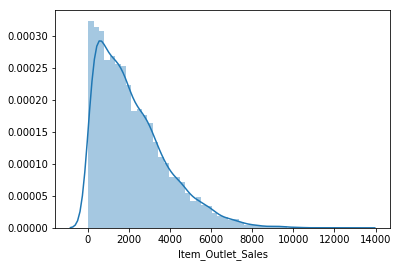

In [184]:
sns.distplot(train["Item_Outlet_Sales"])
print('Skewness: %f' % train['Item_Outlet_Sales'].skew(), ", highly skewed")

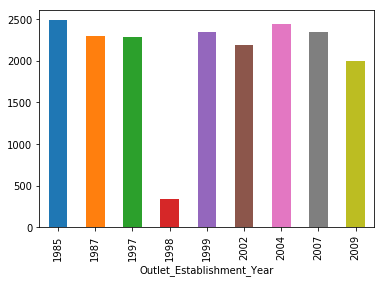

In [185]:
train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

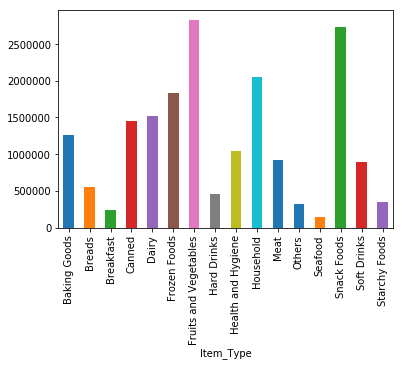

In [186]:
train.groupby('Item_Type')['Item_Outlet_Sales'].sum().plot.bar()

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


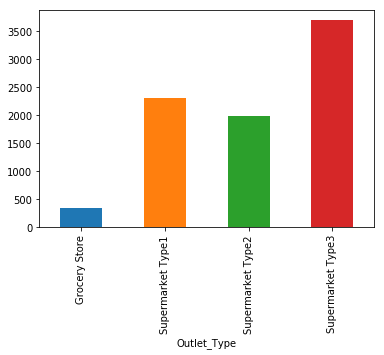

In [187]:
train.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()
train.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

In [188]:
train_id = train.Item_Identifier
test_id = test.Item_Identifier
y_sales = train.Item_Outlet_Sales


In [189]:
train = train.drop(['Item_Outlet_Sales',"Item_Identifier" ], axis = 1)
test  = test.drop(["Item_Identifier"] , axis =1)

In [190]:
combined_data = pd.concat([train, test] , ignore_index = True)
combined_data.sample(5)

C:\Users\91737\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
12601,Regular,192.2820,0.0,Frozen Foods,0.041968,11.500,1987,OUT013,Tier 3,High,Supermarket Type1
11699,Regular,127.7994,0.0,Breakfast,0.020715,21.100,2004,OUT035,Tier 2,Small,Supermarket Type1
7947,LF,224.0772,NaN,Fruits and Vegetables,0.175996,19.850,1997,OUT046,Tier 1,Small,Supermarket Type1
763,Low Fat,54.7930,NaN,Health and Hygiene,0.054752,7.565,2002,OUT045,Tier 2,NaN,Supermarket Type1
1249,Low Fat,91.4462,NaN,Fruits and Vegetables,0.099310,18.350,2002,OUT045,Tier 2,NaN,Supermarket Type1


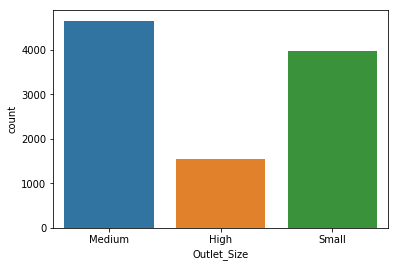

In [191]:
sns.countplot(x="Outlet_Size", data= combined_data)

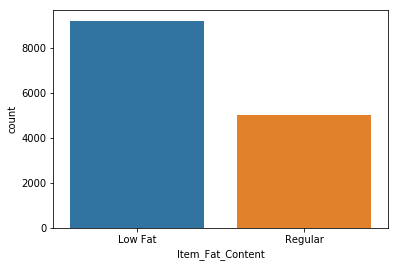

In [192]:
combined_data ["Outlet_Size"] = combined_data["Outlet_Size"].fillna((combined_data["Outlet_Size"].mode()[0] ))
combined_data["Item_Fat_Content"] = combined_data["Item_Fat_Content"].replace({"low fat" :"Low Fat","LF" :"Low Fat", "reg" : "Regular"})
sns.countplot(x="Item_Fat_Content", data= combined_data)

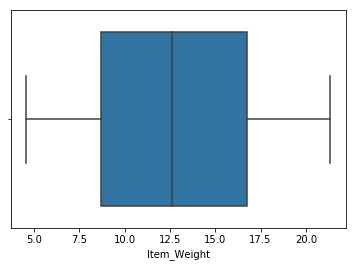

In [193]:
sns.boxplot(x = "Item_Weight", data = combined_data)

In [194]:
combined_data["Item_Weight"] = combined_data["Item_Weight"].fillna((combined_data["Item_Weight"].mean() ))
combined_data.isnull().sum()

Item_Fat_Content                0
Item_MRP                        0
Item_Outlet_Sales            8523
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
dtype: int64

In [195]:
combined_data.columns

Index(['Item_Fat_Content', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type'],
      dtype='object')

In [196]:
combined_data = pd.get_dummies(combined_data, columns = ["Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Establishment_Year","Outlet_Size", "Outlet_Location_Type", "Outlet_Type" ], drop_first = True)
combined_data.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,NaN,0.016047,9.30,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,48.2692,NaN,0.019278,5.92,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,141.6180,NaN,0.016760,17.50,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,182.0950,NaN,0.000000,19.20,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,53.8614,NaN,0.000000,8.93,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [197]:
X_train = combined_data[:len(train)]
X_test = combined_data[len(train):]
X_test

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,107.8622,0.0,0.007565,20.750000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8524,87.3198,0.0,0.038428,8.300000,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
8525,241.7538,0.0,0.099575,14.600000,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8526,155.0340,0.0,0.015388,7.315000,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
8527,234.2300,0.0,0.118599,12.792854,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
8528,117.1492,0.0,0.063817,9.800000,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8529,50.1034,0.0,0.082602,19.350000,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
8530,81.0592,0.0,0.015782,12.792854,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
8531,95.7436,0.0,0.123365,6.305000,1,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8532,186.8924,0.0,0.005698,5.985000,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [198]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [199]:
trainX, testX, trainY, testY = train_test_split(X_train, y_sales,test_size = 0.2, random_state = 0) 
from  sklearn.preprocessing  import StandardScaler
slc= StandardScaler()
trainX = slc.fit_transform(trainX)
X_test = slc.transform(X_test)
testX = slc.transform(testX)

C:\Users\91737\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\91737\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:776: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\91737\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:781: RuntimeWarning: Degrees of freedom <= 0 for slice.
  new_unnormalized_variance = np.nanvar(X, axis=0) * new_sample_count
C:\Users\91737\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\91737\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler

In [200]:
num_folds = 10
seed = 0
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=num_folds, random_state=seed)

In [201]:
model = XGBRegressor(n_estimators=70 , learning_rate = .1)
score_= cross_val_score(model, trainX, trainY, cv=kfold, scoring=scoring)
model.fit(trainX, trainY)
predictions = model.predict(testX)
print(r2_score(testY, predictions))
rmse = np.sqrt(mean_squared_error(testY, predictions))

C:\Users\91737\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\91737\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\91737\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\91737\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\91737\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\91737\Anaco

0.5940100453012531


In [202]:
rmse = np.sqrt(mean_squared_error(testY, predictions))
rmse

1090.0805184341584

In [203]:
y_pred = model.predict(X_test)
my_submission = pd.DataFrame({'Id': test_id, 'SalePrice': y_pred})
my_submission.to_csv('submission_sales.csv', index=False)